# Forward Kinematics (2D)

In [1]:
%matplotlib notebook
from matplotlib import pylab as plt
from numpy import sin, cos, pi, matrix, random
from __future__ import division
from math import atan2
from IPython import display
from ipywidgets import interact, fixed

## Coordinate Transformation

In [2]:
def trans(x, y, a):
    '''create a 2D transformation'''
    s = sin(a)
    c = cos(a)
    return matrix([[c, -s, x],
                   [s,  c, y],
                   [0,  0, 1]])

def from_trans(m):
    '''get x, y, theta from transform matrix'''
    return [m[0, -1], m[1, -1], atan2(m[1, 0], m[0, 0])]

In [3]:
trans(1, 2, 0)[1, 0]

0.0

## Parameters of robot arm

In [10]:
l = [0 3, 2, 1] # * 5
N = len(l) - 1  # number of links
print(N)
max_len = sum(l)
a = random.random_sample(N)  # angles of joints
T0 = trans(0, 0, 0)  # base

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1145445286.py, line 1)

## Forward Kinematics

In [11]:
def forward_kinematics(T0, l, a):
    print(type(T0))
    T = [T0]
    for i in range(len(a)):
        Ti = T[-1] * trans(l[i], 0, a[i])
        T.append(Ti)
    Te = T[-1] * trans(l[-1], 0, 0)  # end effector
    T.append(Te)
    return T

<IPython.core.display.Javascript object>


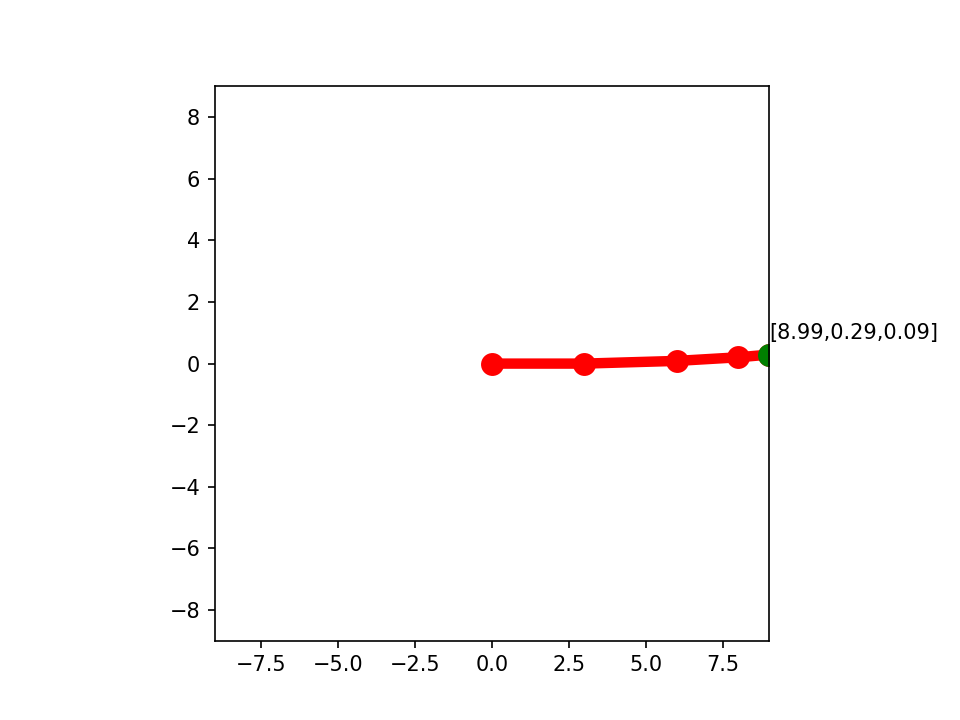

<class 'numpy.matrix'>
x:  [0.0, 3.0, 6.0, 7.99914720608301, 8.997441981877763]


interactive(children=(FloatSlider(value=0.0, description='value', max=1.5707963267948966, min=-1.5707963267948…

interactive(children=(FloatSlider(value=0.0, description='value', max=1.5707963267948966, min=-1.5707963267948…

interactive(children=(FloatSlider(value=0.0, description='value', max=1.5707963267948966, min=-1.5707963267948…

In [12]:
ax = plt.axes()
def show_robot_arm(T):
    plt.cla()
    x = [Ti[0,-1] for Ti in T]
    y = [Ti[1,-1] for Ti in T]
    print("x: ", x)
    plt.plot(x, y, '-or', linewidth=5, markersize=10)
    plt.plot(x[-1], y[-1], 'og', linewidth=5, markersize=10)
    plt.xlim([-max_len, max_len])
    plt.ylim([-max_len, max_len])
    ax.set_aspect('equal')
    t = atan2(T[-1][1, 0], T[-1][0,0])
    ax.annotate('[%.2f,%.2f,%.2f]' % (x[-1], y[-1], t), xy=(x[-1], y[-1]), xytext=(x[-1], y[-1] + 0.5))
    plt.show()

T = forward_kinematics(T0, l, a)
show_robot_arm(T)



for i in range(N):
    @interact(value=(-pi/2, pi/2, 0.1), n=fixed(i))
    def set_joint_angle(n, value=0):
        global a
        a[n] = value
        T = forward_kinematics(T0, l, a)
        show_robot_arm(T)
